# Создание модели машинного обучения для предприятия "Вольный луг"

**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

**Цель проекта**

Фермер просит разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
1. средний удой за год — не менее 6000 килограммов;
2. молоко должно быть вкусным.

**Описание данных**

Мы имеем три датафрема

**1. ferma_main.csv**

 - id — уникальный идентификатор коровы.
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Жирность,% — содержание жиров в молоке (в процентах).
 - Белок,% — содержание белков в молоке (в процентах).
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете *ferma_main.csv* можно разделить на группы.

 - Характеристики коровы: id, Порода, порода папы_быка, Возраст.
 - Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
 - Характеристика пастбища: Тип пастбища.
 - Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

**2. ferma_dad.csv**

 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.

**3. cow_buy.csv**

 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Имя_папы — имя папы коровы.
 - Текущая_жирность,% — содержание жиров в молоке (в процентах).
 - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
 
Данные в файлах *ferma_main.csv* и *cow_buy.csv* похожи, но у датасета *cow_buy.csv* несколько особенностей.

 - Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
 - Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
 - Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!
 
**План работы:**

[1. Загрузка данных](#section_1)

[2. Предобработка данных](#section_2)

[3. Исследовательский анализ данных](#section_3)

[4. Корреляционный анализ](#section_4)

[5. Обучение модели линейной регрессии](#section_5)

[6. Обучение модели логистической регрессии](#section_6)

[7. Итоговые выводы](#section_7)

## 1 Загрузка данных
<a id='section_1'></a>

### Загрузка библиотек и датафреймов

In [1]:
#Загрузка библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

from matplotlib import pyplot as plt

import scipy.stats as st
from scipy.stats import binom, norm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [2]:
#Загрузка датафреймов
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

### Первичный просмотр данных

#### ferma_main

In [3]:
#Общая информация ferma_main
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [4]:
#Первые 5 строк ferma_main
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


#### ferma_dad

In [5]:
#Общая информация ferma_dad
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
#Первые 10 строк ferma_dad
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### cow_buy

In [7]:
#Общая информация cow_buy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [8]:
#Первые 10 строк cow_buy
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Приведение к snake_case названий столбцов

#### ferma_main

In [9]:
#Приведение к snake_case ferma_main
column_names = list(ferma_main.columns) 
for i in range(len(column_names)):  
    column_name = column_names[i]  
    snake_cased_column_name = column_name.replace(' ', '_').lower()  
    snake_cased_column_name = snake_cased_column_name.replace(',%', '_%')
    snake_cased_column_name = snake_cased_column_name.replace(',', '')
    ferma_main.rename(columns={column_name: snake_cased_column_name}, inplace=True)  
    ferma_main.rename(columns={'эке_(энергетическая_кормовая_единица)': 'эке', 'спо_(сахаро-протеиновое_соотношение)': 'спо'}, inplace=True)
ferma_main.columns

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст'],
      dtype='object')

#### ferma_dad

In [10]:
#Приведение к snake_case ferma_dad
ferma_dad.rename(columns={'Имя Папы': 'имя_папы'}, inplace=True)
ferma_dad.columns

Index(['id', 'имя_папы'], dtype='object')

#### cow_buy

In [11]:
#Приведение к snake_case cow_buy
column_names = list(cow_buy.columns) 
for i in range(len(column_names)):  
    column_name = column_names[i]  
    snake_cased_column_name = column_name.replace(' ', '_').lower()  
    snake_cased_column_name = snake_cased_column_name.replace(',', '_')
    cow_buy.rename(columns={column_name: snake_cased_column_name}, inplace=True) 
cow_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_уровень_белок_%', 'возраст'],
      dtype='object')

### **Вывод**

1. Загрузили данные из 3x датафреймов
2. Привели название столбцов к snake_case

Типы дынных:
1. ferma_main (634 записи)
    - Категориальные: порода, тип_пастбища, порода_папы_быка, вкус_молока, возраст.
    - Колличественные: id, удой_кг, эке, сырой_протеин_г, спо, жирность_%, белок_%.
2. ferma_dad (629 записей)
    - Категориальные: имя_папы.
    - Колличественные: id.
3. cow_buy (20 записей)
    - Категориальные: порода, тип_пастбища, порода_папы_быка, имя_папы, возраст. 
    - Колличественные: текущая_жирность_%, текущий_уровень_белок_%.

Пропуски отсутствуют.
        

##  2 Предобработка данных
<a id='section_2'></a>

### Изменение типов данных

In [12]:
def cols_to_float(df, cols):
    for col in cols:
        df[col] = df[col].str.replace(',', '.')
        df[col] = df[col].astype('float')

#### ferma_main

In [13]:
#Приведение столбцов ferma_main к типу float
cols = ['эке', 'спо', 'жирность_%', 'белок_%']
cols_to_float(ferma_main, cols)

#### cow_buy

In [14]:
#Приведение столбцов cow_buy к типу float
cols = ['текущая_жирность_%', 'текущий_уровень_белок_%']
cols_to_float(cow_buy, cols)

### Исправление неявных дубликатов в столбцах

In [15]:
#Функция для вывода уникальных значений столбцов
def unique_values(df, cols):
    for col in cols:
        print(f'{col}:', df[col].unique())

#### ferma_main

In [16]:
#Уникальные значения категориальных столбцов
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
unique_values(ferma_main, cols)

порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
тип_пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
порода_папы_быка: ['Айдиал' 'Соверин' 'Айдиалл']
вкус_молока: ['вкусно' 'не вкусно']
возраст: ['более_2_лет' 'менее_2_лет']


In [17]:
#Исправление неявных дублоикатов в столбце тип_пастбища
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные','Равнинное')

#Исправление неявных дублоикатов в столбце порода_папы_быка
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл','Айдиал')

In [18]:
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
unique_values(ferma_main, cols)

порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
тип_пастбища: ['Равнинное' 'Холмистое']
порода_папы_быка: ['Айдиал' 'Соверин']
вкус_молока: ['вкусно' 'не вкусно']
возраст: ['более_2_лет' 'менее_2_лет']


#### ferma_dad

In [19]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

#### cow_buy

In [20]:
#Уникальные значения категориальных столбцов
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']
unique_values(cow_buy, cols)

порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
тип_пастбища: ['холмистое' 'равнинное']
порода_папы_быка: ['Айдиал' 'Соверин']
имя_папы: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
возраст: ['более_2_лет' 'менее_2_лет']


### Приведение категориальных значений к единому виду

In [21]:
#Функция для приведения категориальных значний к единому виду
def columns_to_view(df, cols):
    for col in cols:
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace(' ', '')
        df[col] = df[col].str.replace('_', '')

#### ferma_main

In [22]:
#Приведение к единому виду столбцов ferma_main
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
columns_to_view(ferma_main, cols)

#### ferma_dad

In [23]:
#Приведение к единому виду столбцов ferma_dad
cols=['имя_папы']
columns_to_view(ferma_dad, cols)

#### cow_buy

In [24]:
#Приведение к единому виду столбцов cow_buy
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']
columns_to_view(cow_buy, cols)

### Удаление дубликатов

#### ferma_main

In [25]:
#Кол-во дубликатов в ferma_main
ferma_main.duplicated().sum()

5

In [26]:
#Дубликаты в ferma_main
ferma_main[ferma_main.duplicated()]

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,невкусно,более2лет
630,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,невкусно,более2лет
631,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,невкусно,более2лет
632,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,невкусно,более2лет
633,627,5970,14.4,1837,0.88,рефлешнсоверинг,холмистое,соверин,3.64,3.075,невкусно,более2лет


In [27]:
#Удаление дубликатов в ferma_main
ferma_main = ferma_main.drop_duplicates().reset_index(drop = True)
len(ferma_main)

629

#### ferma_dad

In [28]:
#Кол-во дубликатов в ferma_dad
ferma_dad.duplicated().sum()

0

#### cow_buy

In [29]:
#Кол-во дубликатов в cow_buy
cow_buy.duplicated().sum()

4

In [30]:
#Все строки cow_buy
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее2лет
6,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет
7,висбикайдиал,равнинное,соверин,буйный,3.57,3.079,более2лет
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее2лет


В таблице cow_buy есть дубликаты, однако мы не можем точно сказать, что это действительно дубликаты, а не одинаковые коровы, поэтому удалять эти дубликаты не будем.

### Итоги предобработки данных

In [31]:
#Общая информация датафреймов
ferma_main.info()
print('___________________________________________________________\n')
ferma_dad.info()
print('___________________________________________________________\n')
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой_кг           629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин_г   629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность_%        629 non-null    float64
 9   белок_%           629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB
___________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Colu

In [32]:
#Первые 5 строк датафреймов информация датафреймов
print('\nferma_main:')
display(ferma_main.head())
print('\nferma_dad:')
display(ferma_dad.head())
print('\ncow_buy:')
display(cow_buy.head())


ferma_main:


,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,висбикайдиал,равнинное,айдиал,3.58,3.076,вкусно,более2лет
1,2,5529,12.8,2138,0.890,висбикайдиал,равнинное,соверин,3.54,3.079,вкусно,менее2лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,невкусно,более2лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,невкусно,более2лет
4,5,5302,12.8,1675,0.885,висбикайдиал,равнинное,соверин,3.73,3.073,вкусно,менее2лет



ferma_dad:


,id,имя_папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин



cow_buy:


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет


### Вывод

При предобработке данных было сделано следующее:

1. Были изменены типы данных:
    - ferma_main: 'эке', 'спо', 'жирность_%', 'белок_%' ---> float
    - cow_buy: 'текущая_жирность_%', 'текущий_уровень_белок_%' ---> float
2. Были исправллены неявные дубликаты в столбцах тип_пастбища и порода_папы_быка датафрейма ferma_main.
3. Категориальные значения были приведены к единому виду во всех датафреймах
4. Было удалено 5 дубликатов в ferma_main (в ferma_main осталось 629 записей)

## 3 Исследовательский анализ данных
<a id='section_3'></a>

### Анализ ferma_main

#### Колличественные признаки

In [33]:
#Describe для ferma_main
ferma_main[['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']].describe()

,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Видно выброс в удой кг.

In [34]:
#Выброс
ferma_main.query('удой_кг > 10000')

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,висбикайдиал,холмистое,айдиал,3.22,3.076,вкусно,более2лет


In [35]:
#Удаление выброса
ferma_main = ferma_main.query('удой_кг < 10000')

In [36]:
#Функция выводящая гистограмму и диаграмму размаха для колличественных признаков
def hist_box(df, col):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(6)
    fig.set_figwidth(14)

    hist_graph = ax[0]
    boxplot_graph = ax[1]
    
    hist_graph.grid(True)
    boxplot_graph.grid(True)
    
    hist_graph.set_title(f'Гистограмма для {col}')
    boxplot_graph.set_title(f'Диаграмма размаха {col}')
    
    hist_graph.set_xlabel(col)
    hist_graph.set_ylabel('Кол-во коров')
    
    boxplot_graph.set_xlabel(col)
    boxplot_graph.yaxis.set_visible(False)

    hist_graph.hist(df[col], bins=6)
    boxplot_graph.boxplot(df[col], vert=False)

    plt.show()

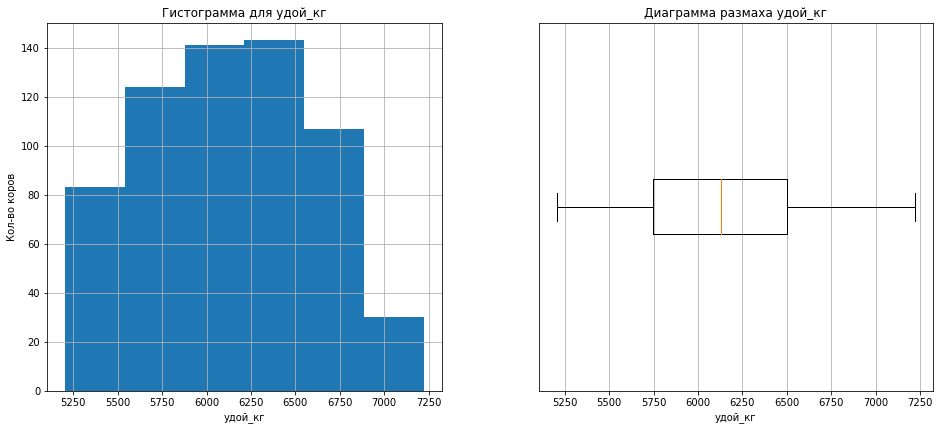

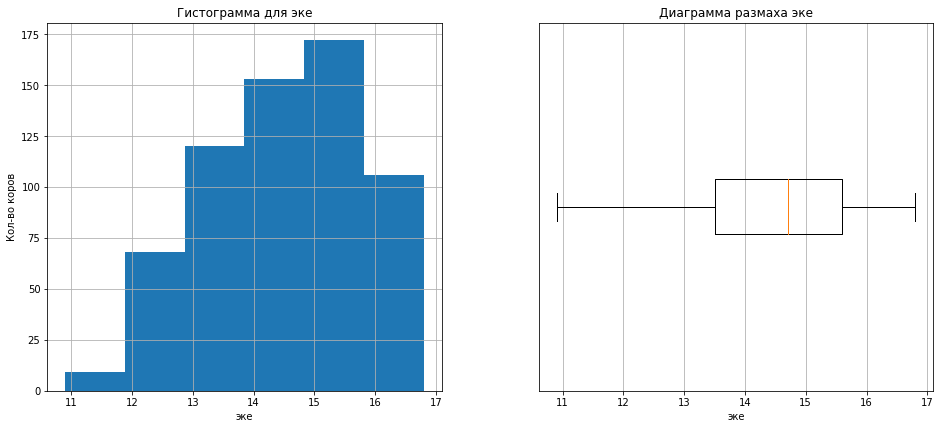

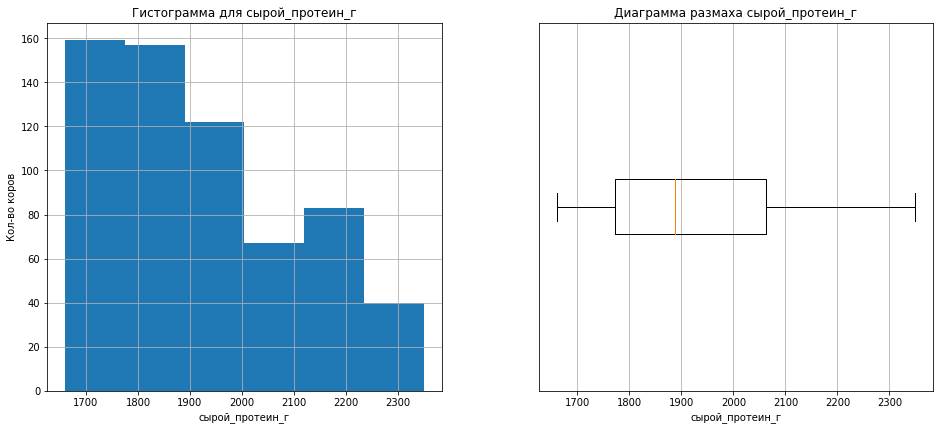

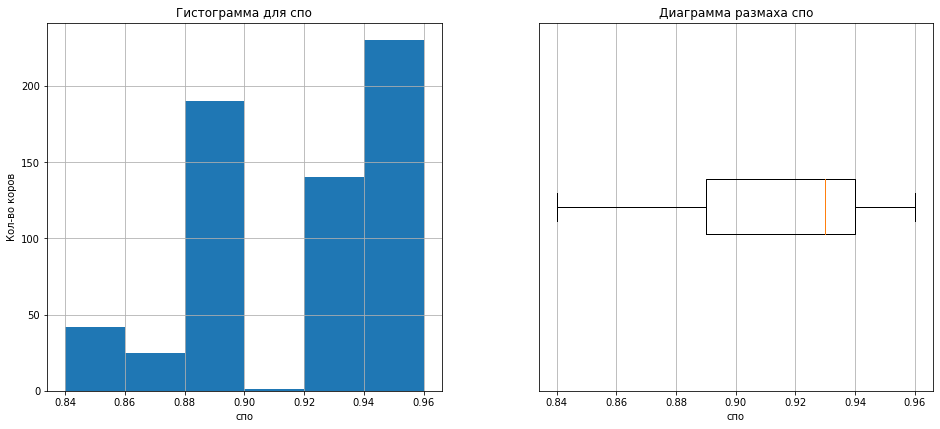

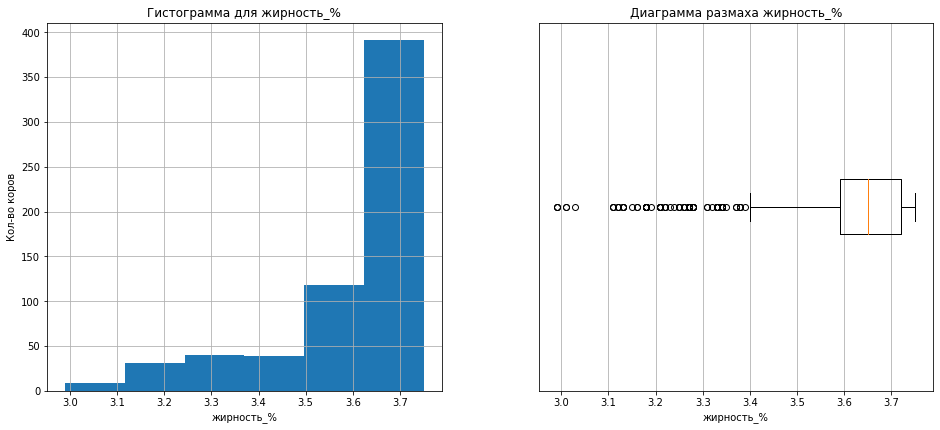

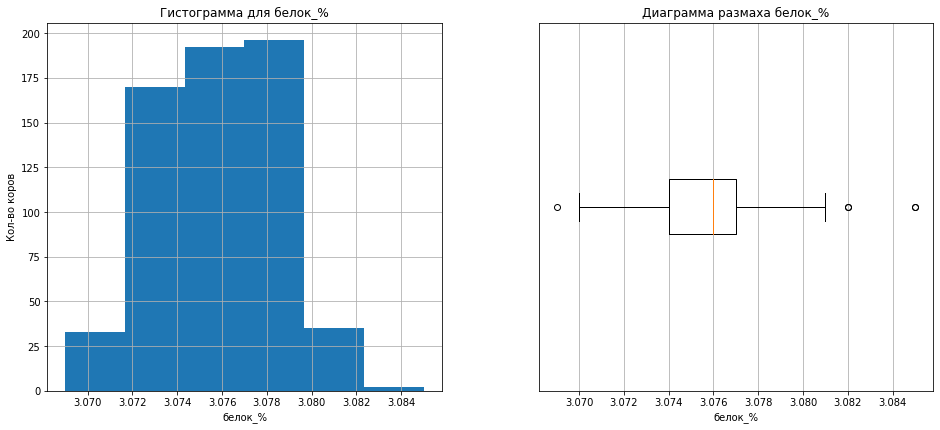

In [37]:
#Гистограммы и диаграммы размаха для колличественных признаков в ferma_main
cols=['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']
for col in cols:
    hist_box(ferma_main, col)

#### Категориальные признаки

In [38]:
#Функция для постороения столбчатой и круговой диаграмм для категориальных данных
def bar_pie(df, col, values):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(4)
    fig.set_figwidth(14)
    
    piv = pd.pivot_table(df, index=col, values=values, aggfunc='count')
    
    bar = ax[0]
    pie = ax[1]
    
    piv.plot(kind='bar', color='orange', ax=bar)
    piv.plot(y=values, kind='pie', ax=pie, autopct='%1.1f%%')
    
    pie.yaxis.set_visible(False)
    
    bar.get_legend().remove()
    pie.get_legend().remove()
    
    bar.tick_params(labelrotation=0)
    bar.set_ylabel('Кол-во коров')
    bar.set_title(f'Столбчатая диаграмма для столбца: {col}')
    bar.grid(True)
    
    pie.set_title(f'Круговая диаграмма для столбца: {col}')

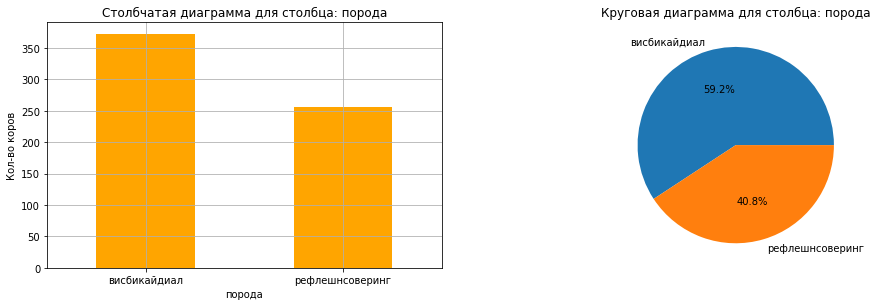

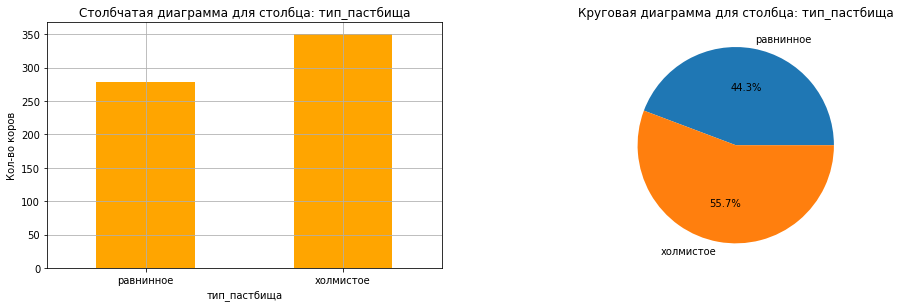

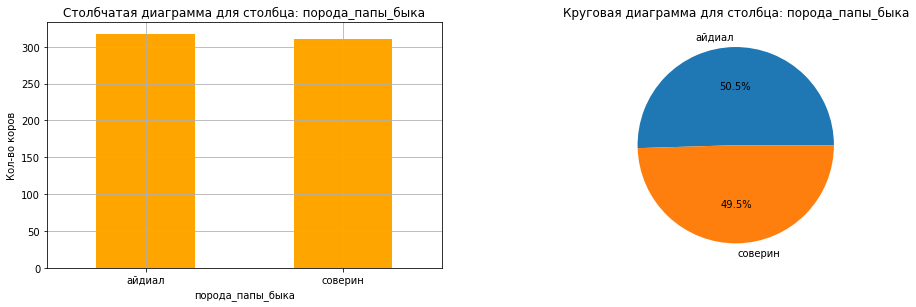

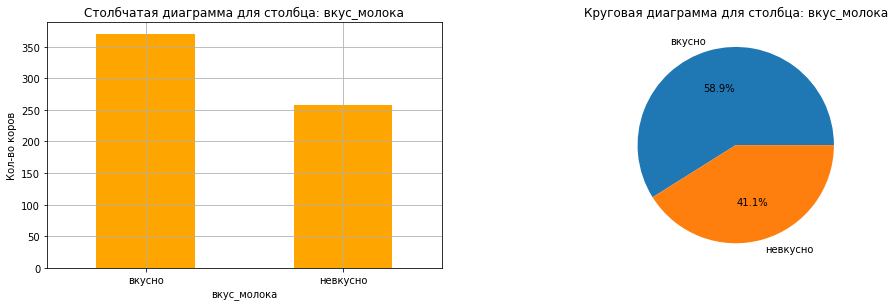

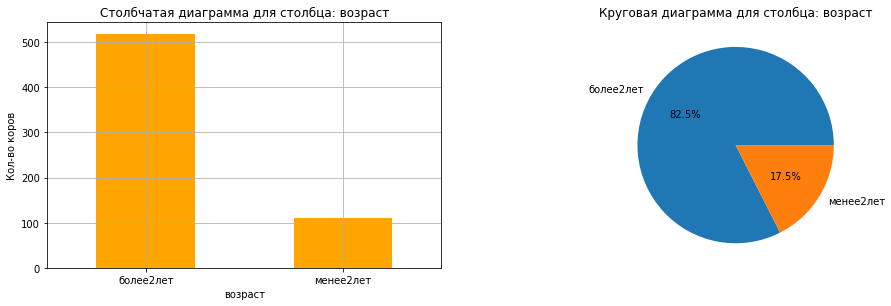

In [39]:
#Столбчатые и круговые диаграммы для категориальных данных из ferma_main
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
for col in cols:
    bar_pie(ferma_main, col, 'id')

#### Вывод по ferma_main

**Колличественные признаки**

1. удой_кг: медиана и среднее значение примерно равны 6100, данные распределены правдоподобно.
2. эке: медиана и среднее значение примерно равны 14.5, данные распределены правдаподобно.
3. сырой_протеин_г: медиана и среднее значение примерно равны 0.92, данные распределены правдаподобно.
4. спо: медиана и среднее значение примерно равны 14.5, данные распределены правдаподобно.
5. жирность_%: медиана и среднее значение примерно равны 3.6, данные распределены правдаподобно.
6. белок_%: медиана и среднее значение примерно равны 3.07, данные распределены правдаподобно.

**Категориальные признаки**

1. порода: Вис Бик Айдиал больше, чем Рефлешн Соверинг.
2. тип_пастбища больше Холмистое, чем Равнинное.
3. порода_папы_быка: Айдиал и Соверинг примерно одинаковое кол-во.
4. вкус_молока: вкусно больше, чем невкусно.
5. возраст: более 2 лет гораздо больше, чем менее 2 лет.

### Анализ ferma_dad

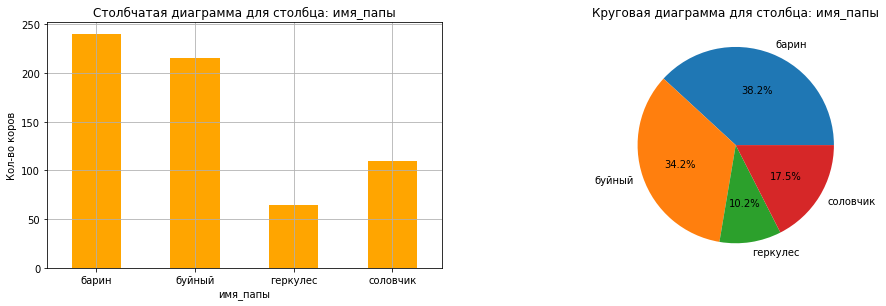

In [40]:
#Столбчатые и круговые диаграммы для категориальных данных из ferma_dad
bar_pie(ferma_dad, 'имя_папы', 'id')

#### Вывод по ferma_dad

имя_папы: всего 4 уникальных значения, преобладают Берин и Буйный.

### Анализ cow_buy

#### Колличественные признаки

In [41]:
#Describe для cow_buy
cow_buy.describe()

,текущая_жирность_%,текущий_уровень_белок_%
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


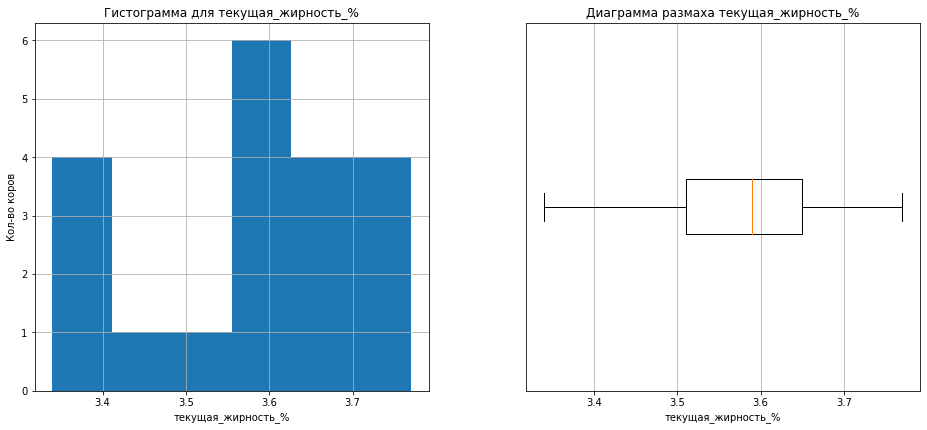

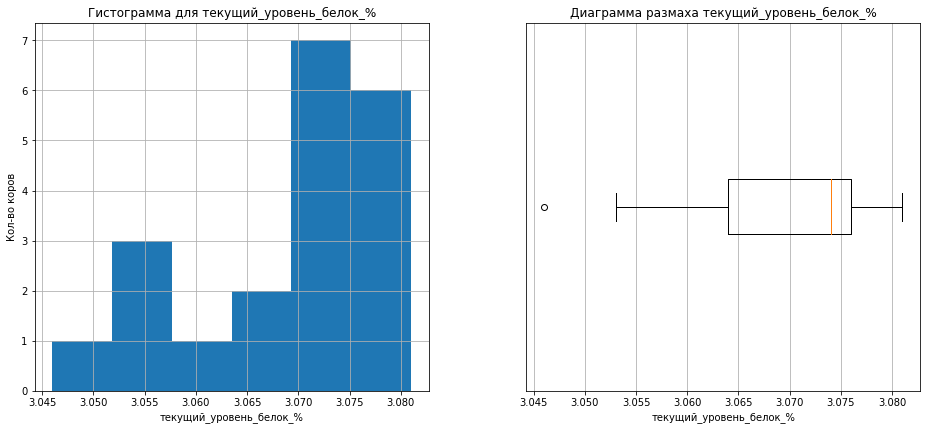

In [42]:
#Гистограммы и диаграммы размаха для колличественных признаков в ferma_main
cols = ['текущая_жирность_%', 'текущий_уровень_белок_%']
for col in cols:
    hist_box(cow_buy, col)

#### Категориальные признаки

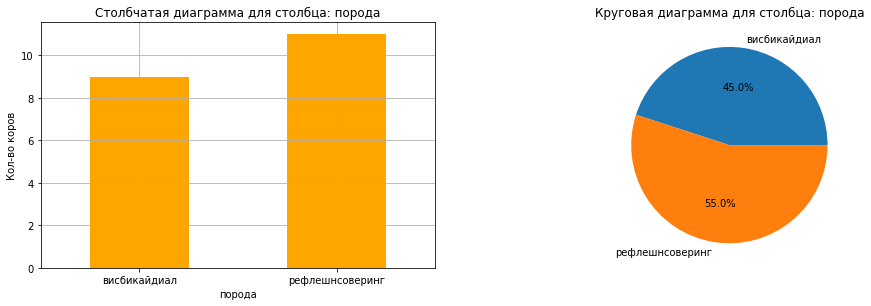

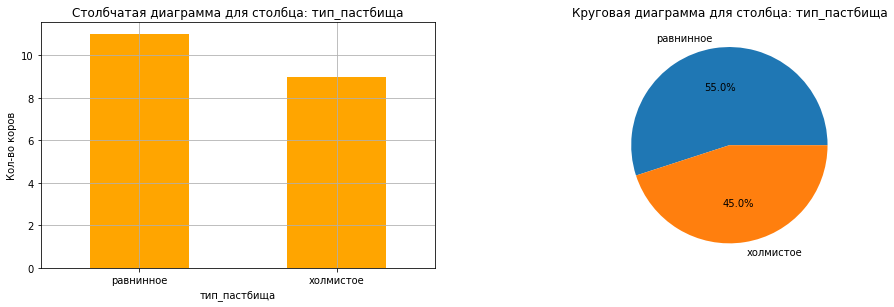

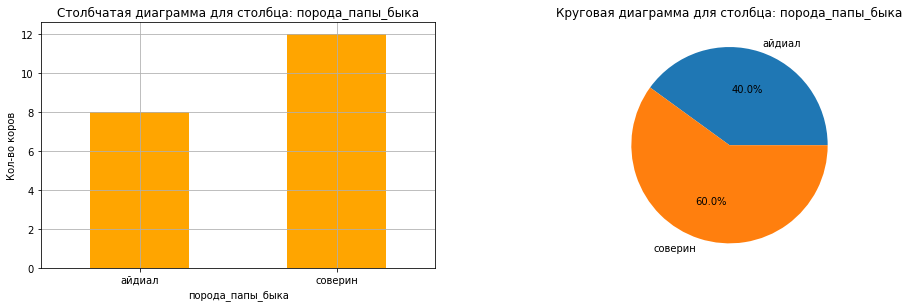

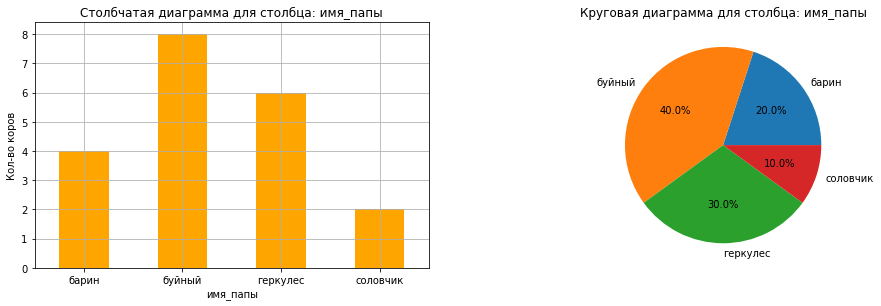

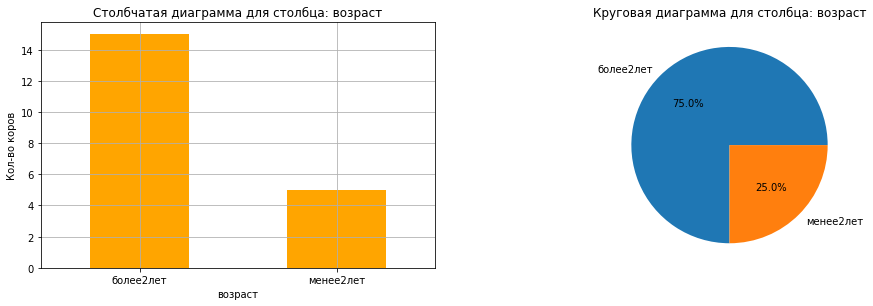

In [43]:
#Столбчатые и круговые диаграммы для категориальных данных из cow_buy
cols=['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']
for col in cols:
    bar_pie(cow_buy, col, 'текущая_жирность_%')

#### Вывод по cow_buy

**Колличественные признаки**

1. текущая_жирность_%: медиана и среднее значение примерно равны 3.6, данные распределены правдаподобно.
2. текущий_белок_%: медиана и среднее значение примерно равны 3.07, данные распределены правдаподобно.

**Категориальные признаки**

1. порода: Вис Бик Айдиал больше, чем Рефлешн Соверинг.
2. тип_пастбища больше Холмистое, чем Равнинное.
3. порода_папы_быка: Айдиал и Соверинг примерно одинаковое кол-во.
4. имя_папы: больше всего Буйный, потом идет Геркулес, Барин и Соловчик.
5. возраст: более2лет больше, чем менее2лет.

### **Вывод**

**ferma_main:**

**Колличественные признаки**

1. удой_кг: медиана и среднее значение примерно равны 6100, данные распределены правдоподобно.
2. эке: медиана и среднее значение примерно равны 14.5, данные распределены правдаподобно.
3. сырой_протеин_г: медиана и среднее значение примерно равны 0.92, данные распределены правдаподобно.
4. спо: медиана и среднее значение примерно равны 14.5, данные распределены правдаподобно.
5. жирность_%: медиана и среднее значение примерно равны 3.6, данные распределены правдаподобно.
6. белок_%: медиана и среднее значение примерно равны 3.07, данные распределены правдаподобно.

**Категориальные признаки**

1. порода: Вис Бик Айдиал больше, чем Рефлешн Соверинг.
2. тип_пастбища больше Холмистое, чем Равнинное.
3. порода_папы_быка: Айдиал и Соверинг примерно одинаковое кол-во.
4. вкус_молока: вкусно больше, чем невкусно.
5. возраст: более 2 лет гораздо больше, чем менее 2 лет.


**ferma_dad:**

имя_папы: всего 4 уникальных значения, преобладают Берин и Буйный.

**cow_buy:**

**Колличественные признаки**

1. текущая_жирность_%: медиана и среднее значение примерно равны 3.6, данные распределены правдаподобно.
2. текущий_белок_%: медиана и среднее значение примерно равны 3.07, данные распределены правдаподобно.

**Категориальные признаки**

1. порода: Вис Бик Айдиал больше, чем Рефлешн Соверинг.
2. тип_пастбища больше Холмистое, чем Равнинное.
3. порода_папы_быка: Айдиал и Соверинг примерно одинаковое кол-во.
4. имя_папы: больше всего Буйный, потом идет Геркулес, Барин и Соловчик.
5. возраст: более2лет больше, чем менее2лет.

## 4 Корреляционный анализ в ferma_main
<a id='section_4'></a>
<a id='heatmap'></a>

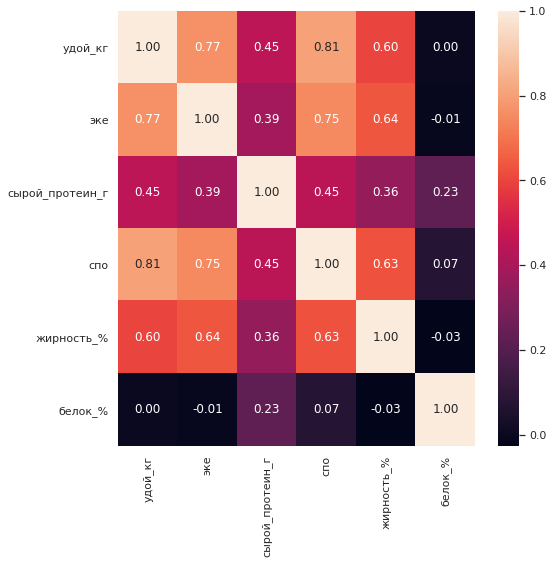

In [44]:
#Коэффициенты корреляции
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(ferma_main[['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']].corr(), annot=True, fmt='.2f') 
plt.show()

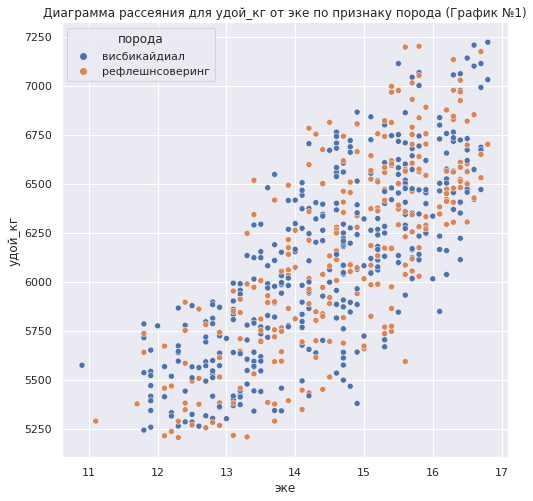

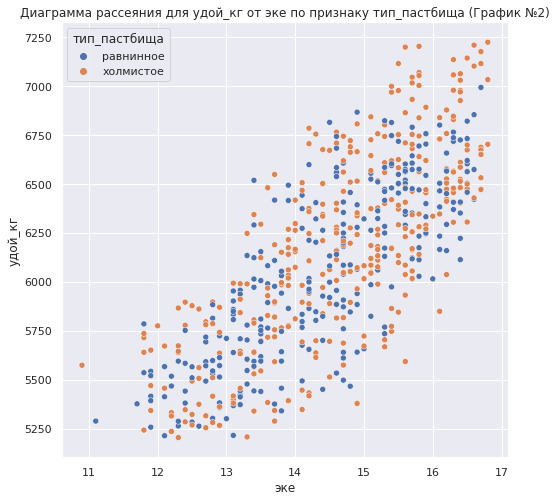

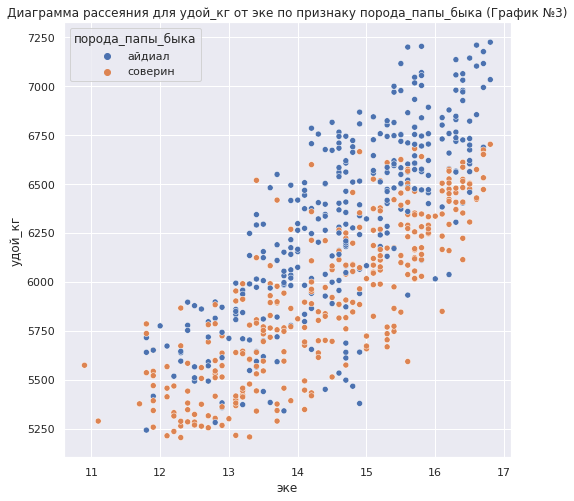

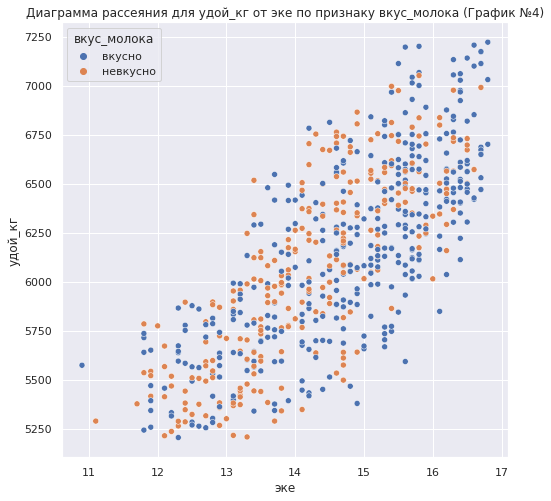

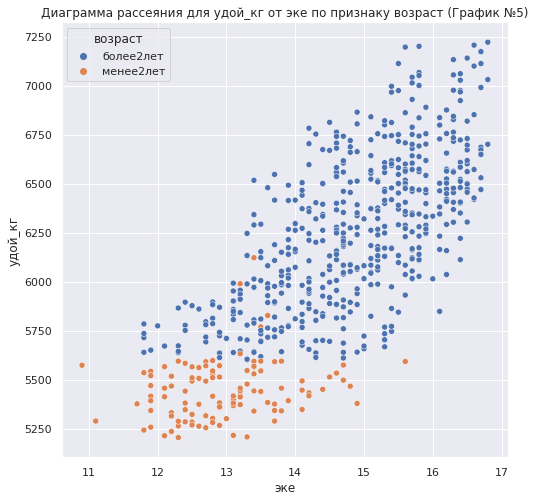

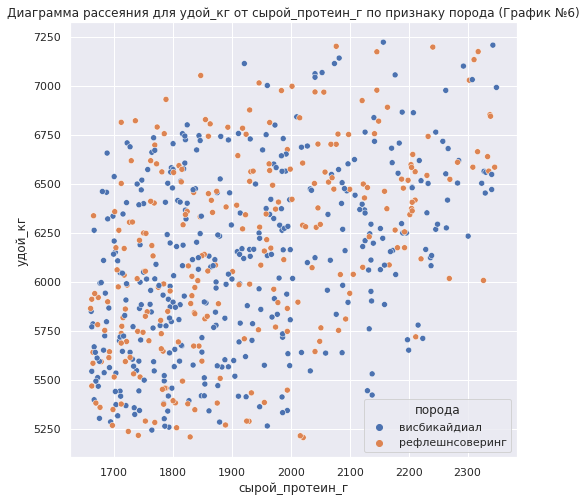

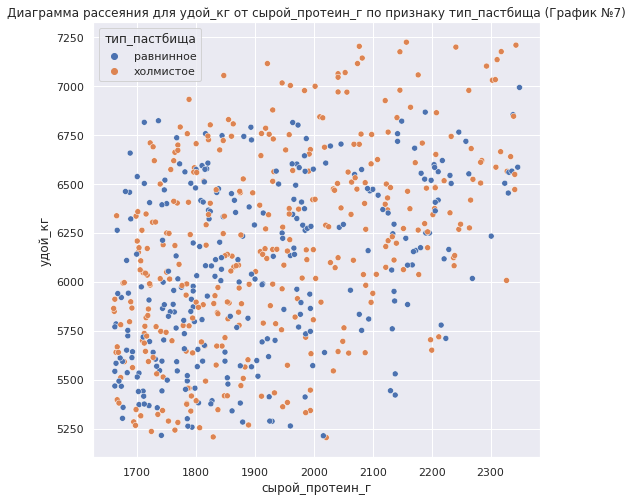

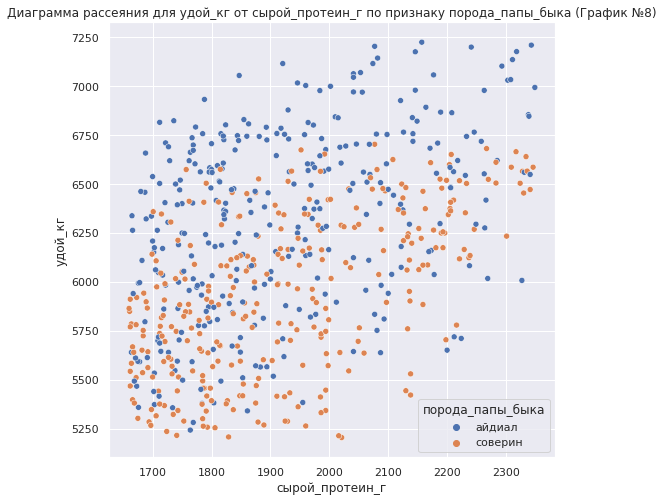

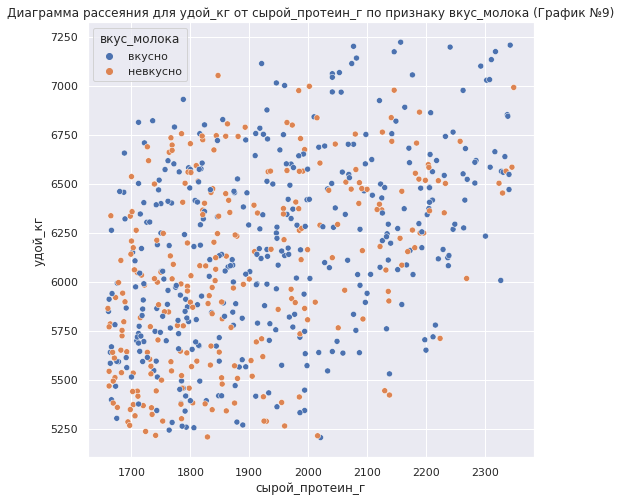

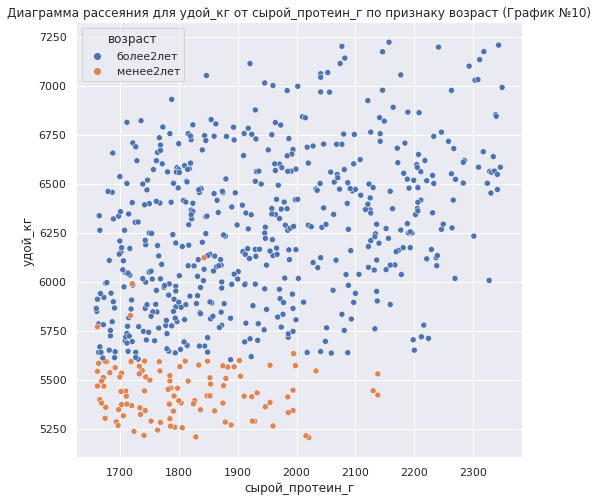

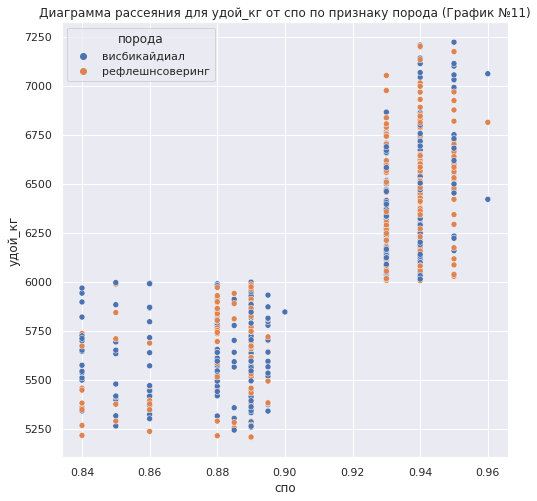

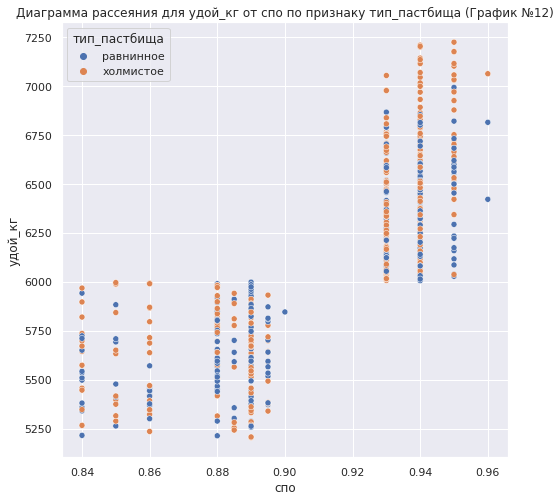

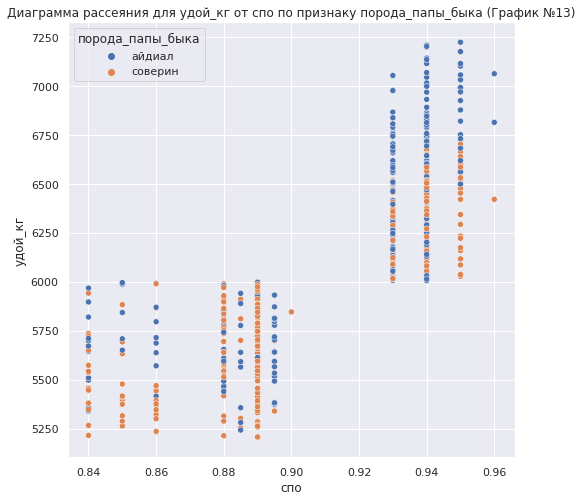

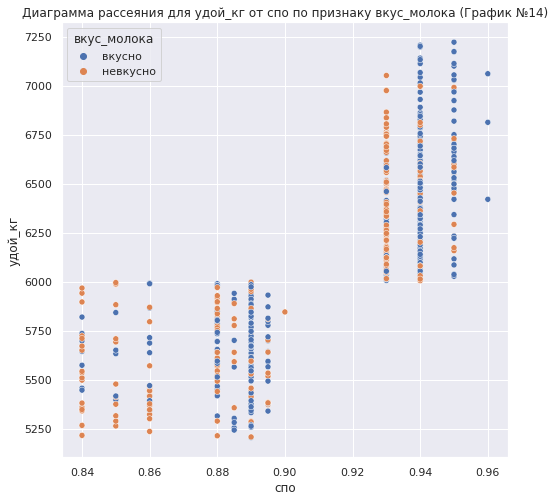

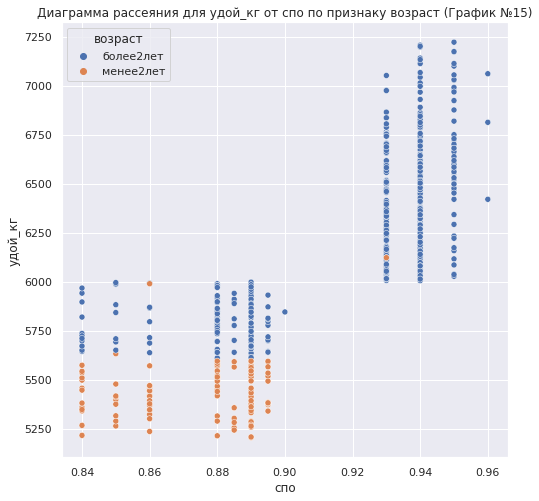

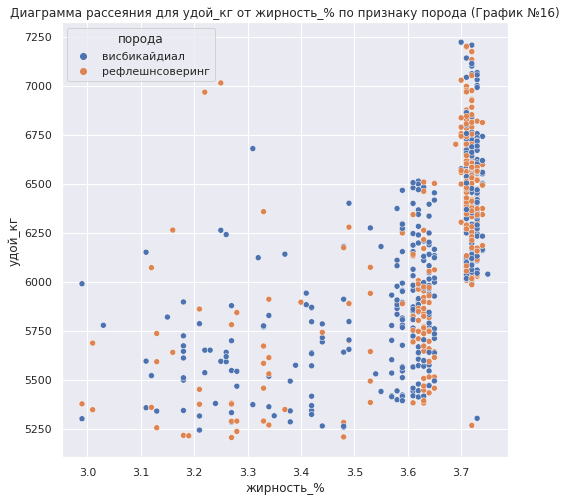

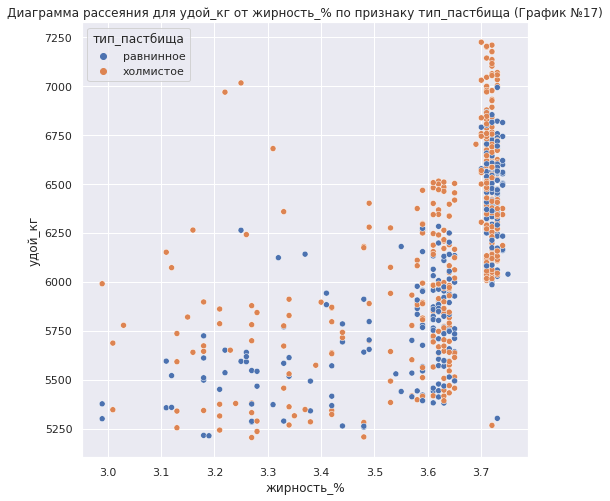

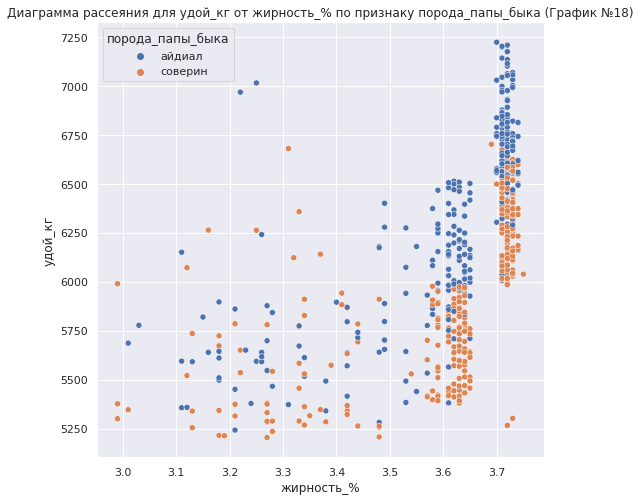

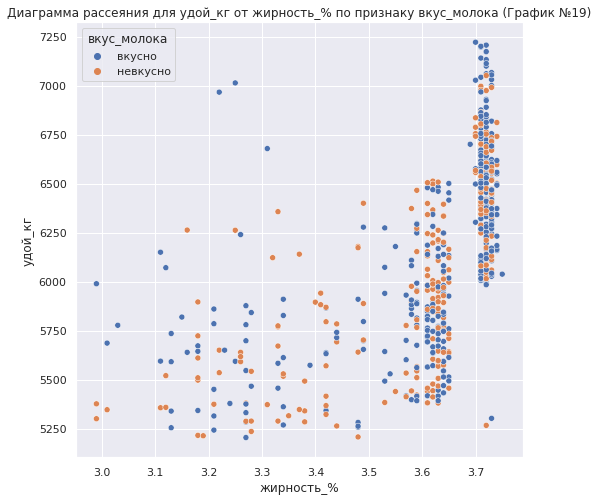

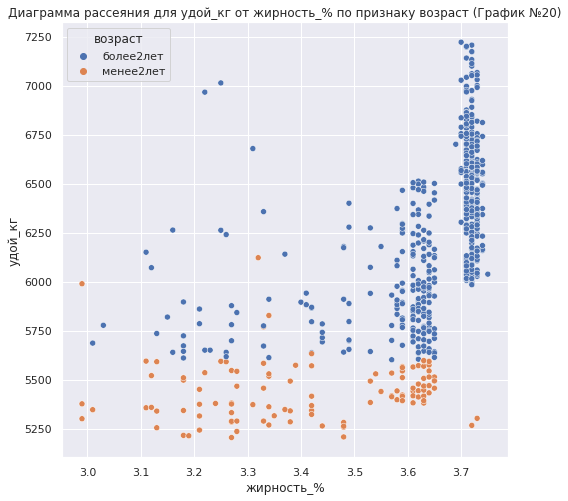

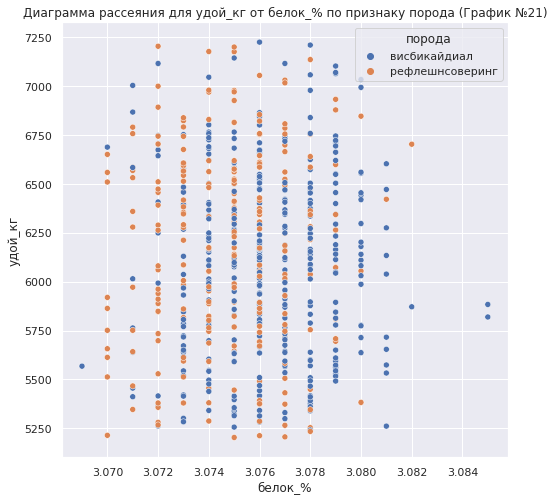

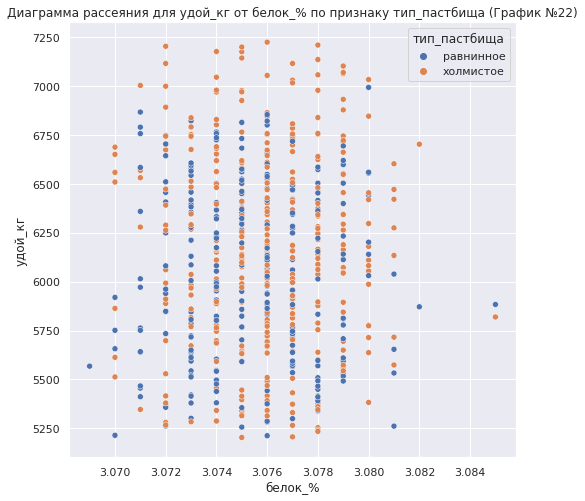

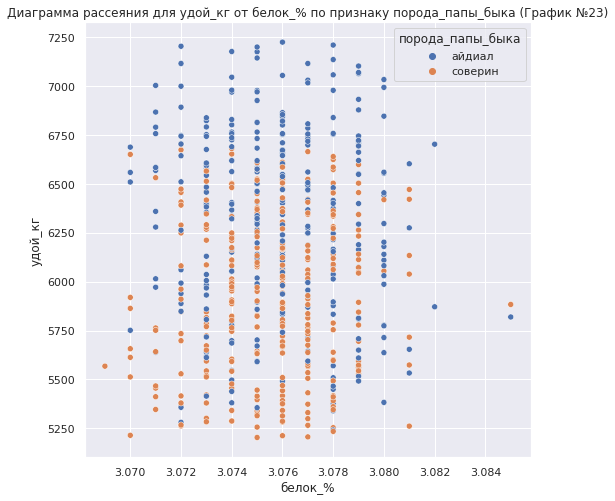

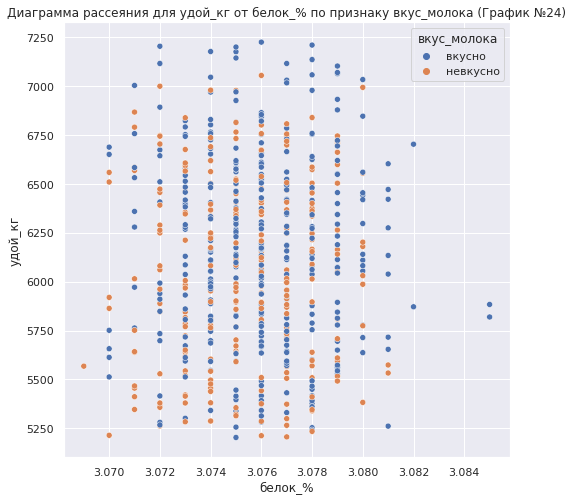

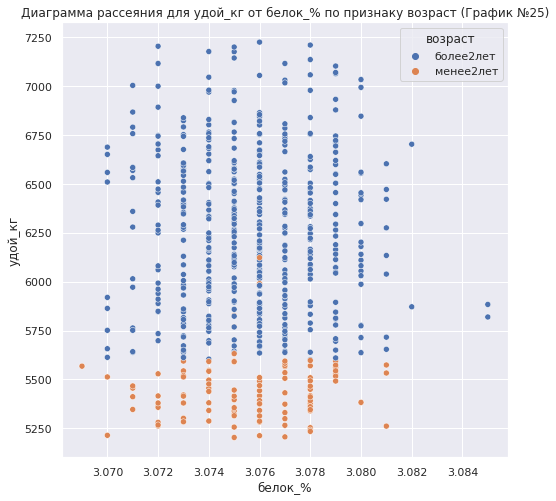

In [45]:
#Поля корреляции для всех признаков
quantitative_cols = ['эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']
categorical_cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
i=1
for quantitative_col in quantitative_cols:
    for categorical_col in categorical_cols:
        sns.scatterplot(data=ferma_main, x=quantitative_col , y='удой_кг', hue=categorical_col)
        plt.title(f'Диаграмма рассеяния для удой_кг от {quantitative_col} по признаку {categorical_col} (График №{i})')
        plt.show()
        i+=1

### Выводы по каждому графику

**Удой_кг имеет корреляцию с эке (0.77).**

1. Порода никак не влияет на удой_кг.
2. Тип_пастбища немного влияет на удой, максимальный удой у холмистого типа.
3. Порода папы быка немного влияет на удой, максимальный удой у породы айдиал.
4. Вкус мололока не влияет на удой.
5. Возраст влияет на удой, возраст более 2 лет всегда дает больший удой, чем меньше 2 лет.

**Удой_кг имеет слабую корреляцию с сырой_протеин_г (0.45).**

6. Порода никак не влияет на удой_кг.
7. Тип_пастбища немного влияет на удой, максимальный удой у холмистого типа.
8. Порода папы быка немного влияет на удой, максимальный удой у породы айдиал.
9. Вкус мололока не влияет на удой.
10. Возраст влияет на удой, возраст более 2 лет всегда дает больший удой, чем меньше 2 лет.

**Удой_кг имеет корреляцию с спо (0.81)**

11. Порода немного влияет на удой_кг, рефлешнсоверинг чаще дает больший удой.
12. Тип_пастбища немного влияет на удой, максимальный удой у холмистого типа.
13. Порода папы быка немного влияет на удой, максимальный удой у породы айдиал.
14. Вкус мололока немного влияет на удой, более высокий удой у вкусного молока.
15. Возраст влияет на удой, возраст более 2 лет всегда дает больший удой, чем меньше 2 лет.

**Удой_кг имеет корреляуию с жирность_% (0.6)**

16. Порода никак не влияет на удой_кг.
17. Тип_пастбища немного влияет на удой, максимальный удой у холмистого типа.
18. Порода папы быка немного влияет на удой, максимальный удой у породы айдиал.
19. Вкус мололока не влияет на удой.
20. Возраст влияет на удой, возраст более 2 лет всегда дает больший удой, чем меньше 2 лет.

**Удой_кг не имеет корреляции с белок_% (0)**

21. Порода никак не влияет на удой_кг.
22. Тип_пастбища немного влияет на удой, максимальный удой у холмистого типа.
23. Порода папы быка немного влияет на удой, максимальный удой у породы айдиал.
24. Вкус мололока не влияет на удой.
25. Возраст влияет на удой, возраст более 2 лет всегда дает больший удой, чем меньше 2 лет.

**Типы связи между целевым признаком (удой_кг) и входными признакакми:**

1. ЭКЕ: Зависимоть похожа на линейную, однако она немного изогнута, что может говорить о другом характере зависимости.

2. Протеин: Зависимость слабо похожа на линейную из-за слишком высокого разброса точек.

3. СПО: Точки разделены на 2 категории: 
    - 1 категория: 0.84 - 0.9 с низким удоем.
    - 2 категория: 0.93 - 0.96 с высоким удоем.
    
4. Жирность: точки формируют 2 больших скопления на 3.6 % и 3.7 % соответственно, все остальные точки разбросаны между 3 и 3.5. Линейной зависимости не наблюдается.

5. Белок: точки разбросаны по всему графику более менее равномерно, накакой зависисти не наблюдается.

Дополнительно посчитаю медианы каждого категориального признака к колличественным, чтобы посмотреть на корреляцию признаков и сравнить их сравнить. Чем больше разница медиан, тем больше будет корреляция.

In [46]:
#Медианы каждего категориального признака к колличественным
cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
for col in cols:
    display(ferma_main.groupby(col).median()[['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']])

,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
порода,,,,,,
висбикайдиал,6112.0,14.6,1885.5,0.93,3.64,3.076
рефлешнсоверинг,6178.5,14.9,1889.5,0.93,3.70,3.075


,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
тип_пастбища,,,,,,
равнинное,6061.0,14.6,1866.0,0.93,3.645,3.075
холмистое,6171.0,14.8,1912.0,0.93,3.650,3.076


,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
порода_папы_быка,,,,,,
айдиал,6370,14.7,1890,0.93,3.70,3.076
соверин,5919,14.6,1880,0.89,3.64,3.076


,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
вкус_молока,,,,,,
вкусно,6166.0,15.0,1925.0,0.935,3.71,3.076
невкусно,6061.5,14.2,1845.0,0.930,3.63,3.075


,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
возраст,,,,,,
более2лет,6267.0,15.0,1928.0,0.93,3.71,3.076
менее2лет,5435.5,12.9,1786.0,0.88,3.42,3.076


1. Порода:
    - Слабая корреляция с ЭКЕ и жирностью.
    - Отсутствует корреляция с протеинами, СПО и белками.

2. Тип пастбища:
    - Слабая корреляция с ЭКЕ и протеинами.
    - Отсутсвует корреляции с СПО, жирностью и белками.
    
3. Порода папы быка:
    - Слабая корреляция с СПО.
    - Отсутствует корреляция с ЭКЕ, протеинами, жирностью и белками.
    
4. Вкус мололка:
    - Слабая корреляция с ЭКЕ, протеинами и жирностью.
    - Отсутствует корреляция с СПО и белками.

5. Возраст:
    - Корреляция с ЭКЕ, протеинами, СПО и жирностью.
    - Отсутсвует корреляция с белками.

### **Вывод**

**Колличественные признаки:**

1. Мультиколлинеарность отсутсвует, самая большая корреляция между ЭКЕ и СПО и составляет 0.75.

2. Белок никак не коррелирует с целевым признаком, поэтому не будем его учитывать в модели.

3. Все остальные колличественные признаки коррелируют с целевым признаком и при этом не так сильно коррелируют друг с другом, избекая мультиколлинеарности.

**Категориальные признаки:**

1. Вкус молока не коррелирует с целевым признаком.

2. Категориальные признаки почти не коррелируют с колличественными, нет мультиколлинернаости.

**Типы связи между целевым признаком (удой_кг) и входными признакакми:**

1. ЭКЕ: Зависимоть похожа на линейную, однако она немного изогнута, что может говорить о другом характере зависимости.

2. Протеин: Зависимость слабо похожа на линейную из-за слишком высокого разброса точек.

3. СПО: Точки разделены на 2 категории: 
    - 1 категория: 0.84 - 0.92 с низким удоем.
    - 2 категория: 0.92 - 0.96 с высоким удоем.
    
    
4. Жирность: точки формируют 2 больших скопления на 3.6 % и 3.7 % соответственно, все остальные точки разбросаны между 3 и 3.5. Линейной зависимости не наблюдается.

5. Белок: точки разбросаны по всему графику более менее равномерно, накакой зависисти не наблюдается.

**Данные для модели:**

Колличественные: ЭКЕ, протеин, СПО, жирность.

Категориальные: порода, тип пастбища, порода папы быка, возраст.

Дополнительные признаки вводить не надо.

## 5 Задача регрессии
<a id='section_5'></a>

In [47]:
#Функция для подготовки данных к обучению и тестированию модели 
def preparing_data_for_training(df, target_attribute, quantitive_features, categorical_features):
    #Разделение данныз на выборки
    RANDOM_STATE = 42

    X = df.drop(target_attribute, axis=1)
    y = df[target_attribute]

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)

    #Масштабирование колличетсвенных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[quantitive_features])
    X_test_scaled = scaler.transform(X_test[quantitive_features])

    #Использование OneHotEncoder для категориальных признаков (кодирование признаков) 
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[categorical_features])
    X_test_ohe = encoder.transform(X_test[categorical_features])

    encoder_col_names = encoder.get_feature_names()
    
    #Соедиение в один датафрейм
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=quantitive_features)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=quantitive_features)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    return X_train, X_test, y_train, y_test, scaler, encoder

In [48]:
def lr_ytest_predictions(X_train, X_test, y_train, y_test):
    #Обучение модели и получение предсказаний на тестовых данных
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
    
    return y_test, predictions, model_lr

### Первая модель

In [49]:
#Создание датафрейма для обучения модели
df_lr = ferma_main[['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']]
df_lr

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,возраст
0,1,5863,14.2,1743,0.890,висбикайдиал,равнинное,айдиал,более2лет
1,2,5529,12.8,2138,0.890,висбикайдиал,равнинное,соверин,менее2лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,более2лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,более2лет
4,5,5302,12.8,1675,0.885,висбикайдиал,равнинное,соверин,менее2лет
...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,рефлешнсоверинг,равнинное,айдиал,более2лет
625,626,5513,12.9,1700,0.880,рефлешнсоверинг,равнинное,соверин,менее2лет
626,627,5970,14.4,1837,0.880,рефлешнсоверинг,холмистое,соверин,более2лет
627,628,5746,13.8,1994,0.890,рефлешнсоверинг,равнинное,соверин,более2лет


In [50]:
#Обучение модели и ее применение на тестовых данных. Получение коэффициента детерминации.
quantitive_features = ['эке', 'сырой_протеин_г', 'спо']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

X_train, X_test, y_train, y_test, scaler1, encoder1 = preparing_data_for_training(df_lr, 'удой_кг', quantitive_features, categorical_features)
y_test, predictions1, model_lr1 = lr_ytest_predictions(X_train, X_test, y_train, y_test)

print('Коэффициент детерминации первой модели:', r2_score(y_test, predictions1))

Коэффициент детерминации первой модели: 0.7844078173416967


In [51]:
#Функция для анализа остатков модели
def residuals_analysis(y_test, predictions):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(4)
    fig.set_figwidth(14)
    
    residuals = y_test - predictions
    
    hist_gr = ax[0]
    scat_gr = ax[1]
    
    hist_gr.hist(residuals)
    hist_gr.set_title('Гистограмма распределения остатков')
    hist_gr.set_xlabel('Остатки')
    
    scat_gr.scatter(predictions1, residuals)
    scat_gr.set_xlabel('Предсказания модели')
    scat_gr.set_ylabel('Остатки')
    scat_gr.set_title('Поле корреляции')
    
    plt.show()

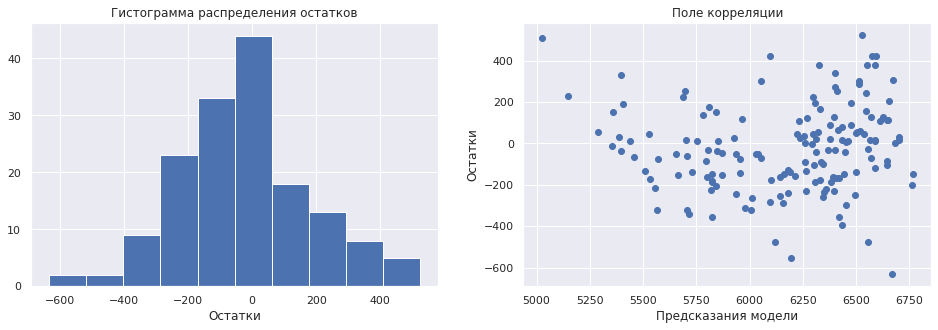

In [52]:
#Анализ остатков первой модели
residuals_analysis(y_test, predictions1)

#### Вывод по первой модели линейной регрессии.
Модель имеет умеренно высокую точность с коэффициентом детерминации остатков 0.784. Остатки распределены нормально с небольшим уклоном в левую сторону. Т.е. модель склонна немного завышать свои предсказания.

Действия для повышения точности модели:

1. Кластеризировать СПО и взять его как категориальный входной признак.
2. Возведем эке в квадрат для устранения нелинейной зависимсоти.


### Вторая модель

In [53]:
#Кластеризация спо и возведение в квадрат эке в данных для обучения модели
df_lr.loc[df_lr['спо']<0.92, ['спо']] = 0
df_lr.loc[df_lr['спо']>=0.92, ['спо']] = 1

df_lr['квадрат_эке'] = df_lr['эке']**2

df_lr

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,возраст,квадрат_эке
0,1,5863,14.2,1743,0.0,висбикайдиал,равнинное,айдиал,более2лет,201.64
1,2,5529,12.8,2138,0.0,висбикайдиал,равнинное,соверин,менее2лет,163.84
2,3,5810,14.0,1854,0.0,рефлешнсоверинг,холмистое,соверин,более2лет,196.00
3,4,5895,12.4,2012,0.0,рефлешнсоверинг,холмистое,айдиал,более2лет,153.76
4,5,5302,12.8,1675,0.0,висбикайдиал,равнинное,соверин,менее2лет,163.84
...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,1.0,рефлешнсоверинг,равнинное,айдиал,более2лет,237.16
625,626,5513,12.9,1700,0.0,рефлешнсоверинг,равнинное,соверин,менее2лет,166.41
626,627,5970,14.4,1837,0.0,рефлешнсоверинг,холмистое,соверин,более2лет,207.36
627,628,5746,13.8,1994,0.0,рефлешнсоверинг,равнинное,соверин,более2лет,190.44


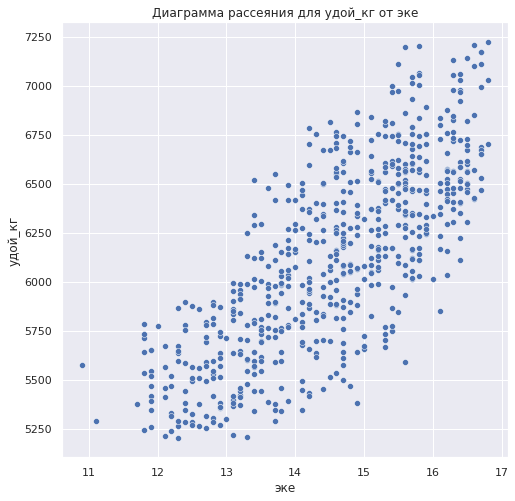

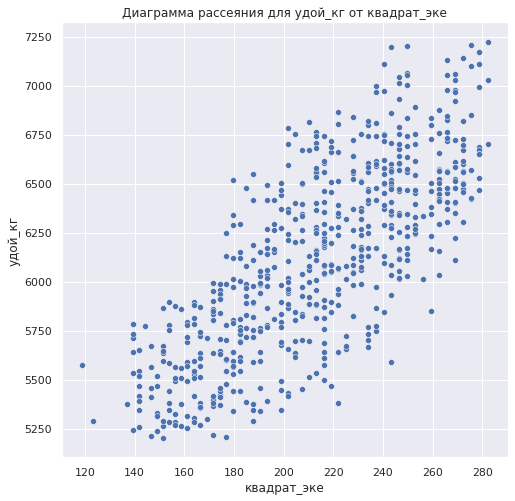

In [54]:
#Сравнение эке и квадрат_эке
sns.scatterplot(data=df_lr, x='эке' , y='удой_кг')
plt.title(f'Диаграмма рассеяния для удой_кг от эке')
plt.show()

sns.scatterplot(data=df_lr, x='квадрат_эке' , y='удой_кг')
plt.title(f'Диаграмма рассеяния для удой_кг от квадрат_эке')
plt.show()

In [55]:
#Обучение модели и ее применение на тестовых данных. Получение коэффициента детерминации.
quantitive_features = ['квадрат_эке', 'сырой_протеин_г']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо']

X_train, X_test, y_train, y_test, scaler2, encoder2 = preparing_data_for_training(df_lr, 'удой_кг', quantitive_features, categorical_features)
y_test, predictions2, model_lr2 = lr_ytest_predictions(X_train, X_test, y_train, y_test)

print('Коэффициент детерминации второй модели:', r2_score(y_test, predictions2))

Коэффициент детерминации второй модели: 0.8180879926867501


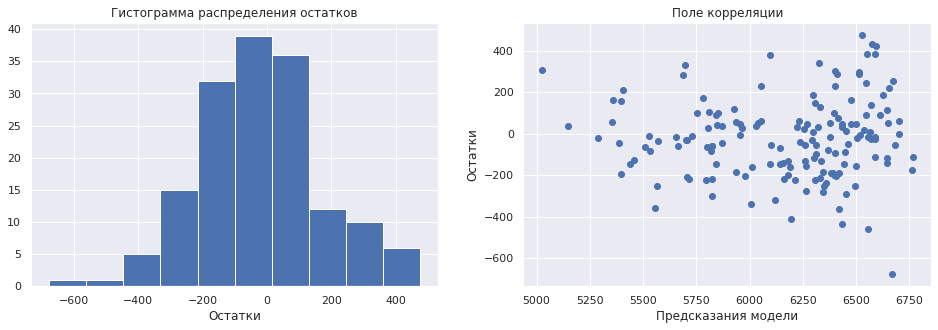

In [56]:
#Анализ остатков второй модели
residuals_analysis(y_test, predictions2)

#### Вывод по второй модели линенйной регрессии

Модель стала немного точнее, коэффициент детерминации 0.818 (против 0.784 у первой модели). Остатки так же распределены с небольшим уклоном в левую сторону. Т.е. модель склонна завышать свои прогнозы относительно реальных данных.

Действия для повышения точности модели:

1. Добавим в модель таблицу ferma_dad.

### Третья модель

In [57]:
#Добавление ferma_dad в данные для обучения
df_lr = df_lr.merge(ferma_dad, how  ='inner', on = 'id')
df_lr

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,возраст,квадрат_эке,имя_папы
0,1,5863,14.2,1743,0.0,висбикайдиал,равнинное,айдиал,более2лет,201.64,буйный
1,2,5529,12.8,2138,0.0,висбикайдиал,равнинное,соверин,менее2лет,163.84,соловчик
2,3,5810,14.0,1854,0.0,рефлешнсоверинг,холмистое,соверин,более2лет,196.00,барин
3,4,5895,12.4,2012,0.0,рефлешнсоверинг,холмистое,айдиал,более2лет,153.76,буйный
4,5,5302,12.8,1675,0.0,висбикайдиал,равнинное,соверин,менее2лет,163.84,барин
...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,1.0,рефлешнсоверинг,равнинное,айдиал,более2лет,237.16,буйный
624,626,5513,12.9,1700,0.0,рефлешнсоверинг,равнинное,соверин,менее2лет,166.41,барин
625,627,5970,14.4,1837,0.0,рефлешнсоверинг,холмистое,соверин,более2лет,207.36,барин
626,628,5746,13.8,1994,0.0,рефлешнсоверинг,равнинное,соверин,более2лет,190.44,барин


In [58]:
#Обучение модели и ее применение на тестовых данных. Получение коэффициента детерминации
quantitive_features = ['квадрат_эке', 'сырой_протеин_г']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы']

X_train, X_test, y_train, y_test, scaler3, encoder3 = preparing_data_for_training(df_lr, 'удой_кг', quantitive_features, categorical_features)
y_test, predictions3, model_lr3 = lr_ytest_predictions(X_train, X_test, y_train, y_test)

print('Коэффициент детерминации третьей модели:', r2_score(y_test, predictions3))

Коэффициент детерминации третьей модели: 0.8247542745210406


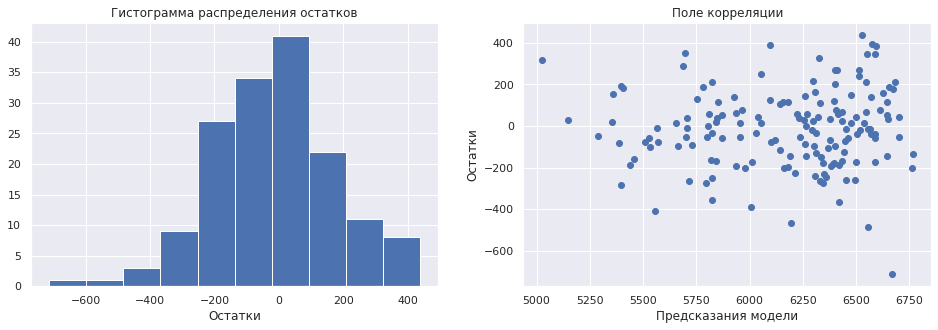

In [59]:
#Анализ остатков третьей модели
residuals_analysis(y_test, predictions3)

#### Вывод по третьей модели

Модель стала еще точнее, коэффициент детерминации равен 0.825 (против 0.818 у второй модели). Остатки так же распределены с небольшим уклоном в левую сторону. Т.е. модель склонна завышать свои прогнозы относительно реальных данных. При высоких удоях точность падает, вероятно это связано с тем, что данных с высоким удоем не так много в тренировочных данных.

### Оценка качества моделей.

In [60]:
#Функция для выведения на экран метрик линейной регрессии
def metrics(name, y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f'{name}: mae: {mae}, mse: {mse}, rmse: {rmse}')

In [61]:
#Метрики моделей
metrics('Модель №1:', y_test, predictions1)

metrics('Модель №2:', y_test, predictions2)

metrics('Модель №3:', y_test, predictions3)

Модель №1:: mae: 164.24194463474925, mse: 43887.015009660514, rmse: 209.4922791170608
Модель №2:: mae: 149.03965222364602, mse: 37030.91131113695, rmse: 192.43417396901452
Модель №3:: mae: 146.16302445362322, mse: 35673.88988618195, rmse: 188.8753289505592


Самая точная модель - третья, ее и будем использовать.

In [62]:
print('95% доверительный интервал третьей модели =', st.norm.interval(0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

95% доверительный интервал третьей модели = (6092.340075854289, 6221.375070058381)


### Прогноз удоя коров

In [63]:
#Создание датафреймя для модели
cow_buy_ml = cow_buy.copy()
cow_buy_ml = cow_buy_ml.drop('текущий_уровень_белок_%', axis=1)

cow_buy_ml['квадрат_эке'] = df_lr['квадрат_эке'].mean() * 1.05
cow_buy_ml['спо'] = ferma_main['спо'].mean() * 1.05
cow_buy_ml['сырой_протеин_г'] = ferma_main['эке'].mean() * 1.05

cow_buy_ml.loc[cow_buy_ml['спо']<0.92, ['спо']] = 0
cow_buy_ml.loc[cow_buy_ml['спо']>=0.92, ['спо']] = 1

cow_buy_ml

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,возраст,квадрат_эке,спо,сырой_протеин_г
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,более2лет,224.025225,1.0,15.276162
1,висбикайдиал,равнинное,соверин,буйный,3.54,менее2лет,224.025225,1.0,15.276162
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,более2лет,224.025225,1.0,15.276162
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,более2лет,224.025225,1.0,15.276162
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,более2лет,224.025225,1.0,15.276162
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,менее2лет,224.025225,1.0,15.276162
6,висбикайдиал,холмистое,айдиал,геркулес,3.58,более2лет,224.025225,1.0,15.276162
7,висбикайдиал,равнинное,соверин,буйный,3.57,более2лет,224.025225,1.0,15.276162
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,более2лет,224.025225,1.0,15.276162
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,менее2лет,224.025225,1.0,15.276162


In [64]:
#Масштабирование колличественных признаков
quantitive_names = ['квадрат_эке', 'сырой_протеин_г']

cow_buy_ml_scaled = scaler3.transform(cow_buy_ml[quantitive_names])

#Использование OneHotEncoder для категориальных признаков (кодирование признаков)
categorical_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы']

cow_buy_ml_ohe = encoder3.transform(cow_buy_ml[categorical_names])

encoder_col_names = encoder3.get_feature_names()
encoder_col_names

array(['x0_рефлешнсоверинг', 'x1_холмистое', 'x2_соверин', 'x3_менее2лет',
       'x4_1.0', 'x5_буйный', 'x5_геркулес', 'x5_соловчик'], dtype=object)

In [65]:
#Соединение в один датафрейм
X_cow_buy_ml_ohe = pd.DataFrame(cow_buy_ml_ohe, columns=encoder_col_names)

X_cow_buy_ml_scaled = pd.DataFrame(cow_buy_ml_scaled, columns=quantitive_names)

X_cow_buy_ml = pd.concat([X_cow_buy_ml_ohe, X_cow_buy_ml_scaled], axis=1)
X_cow_buy_ml

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее2лет,x4_1.0,x5_буйный,x5_геркулес,x5_соловчик,квадрат_эке,сырой_протеин_г
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.293607,-10.41787
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.293607,-10.41787
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.293607,-10.41787
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.293607,-10.41787
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.293607,-10.41787
5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.293607,-10.41787
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.293607,-10.41787
7,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.293607,-10.41787
8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.293607,-10.41787
9,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.293607,-10.41787


In [66]:
#Получение предсказаний на тестовых данных
feed_predictions = model_lr3.predict(X_cow_buy_ml)
feed_predictions

array([6000.52357142, 5769.31530297, 5674.60404993, 5983.69365115,
       5932.75034093, 5815.9844922 , 6000.52357142, 5961.86401172,
       5674.60404993, 5791.14494239, 5735.31213436, 6008.53320095,
       6000.52357142, 5518.07901691, 5674.60404993, 5983.69365115,
       5735.31213436, 5815.9844922 , 5961.86401172, 5932.75034093])

In [67]:
#Создание датафрейма с предсказаниями
cow_buy_pred = cow_buy.copy()
cow_buy_pred['удой_кг'] = feed_predictions
cow_buy_pred

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,удой_кг
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6000.523571
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет,5769.315303
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,5674.604050
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет,5983.693651
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет,5932.750341
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее2лет,5815.984492
6,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6000.523571
7,висбикайдиал,равнинное,соверин,буйный,3.57,3.079,более2лет,5961.864012
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,5674.604050
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее2лет,5791.144942


### **Вывод**

Было сделано три модели: 

Данные для модели:

Колличественные: эке, сырой_протеин_г, спо, жирность_%.

Категориальные: порода, тип_пастбища, порода_папы_быка, возраст.

1. С точностью 0.78. Категориальные данные были обработаны OneHotEncoder, колличестветвенные стандартизированы с помощью StandartScaler.

2. С точностью 0.817. для повышения точности дополнительно было сделано следующее: 
    - СПО было кластеризировано.
    - ЭКЕ возведено в квадрат для устранения нелинейности.
    
3. С точностью 0.823. для повышения точности дополнительно было сделано следующее: 
    - добавлен столбцец имя_папы из ferma_dad.
    
В итоге мы использовали третью модель и получили прогнозы удоя, которые сохранили в cow_buy_pred.

## 6 Задача классификации
<a id='section_6'></a>

### Обучение модели

In [68]:
#Создание датафрейма для обучения
df_cl = ferma_main.copy()

df_cl.loc[df_cl['спо']<0.92, ['спо']] = 0
df_cl.loc[df_cl['спо']>=0.92, ['спо']] = 1

df_cl['вкус_молока'] = df_cl['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

df_cl['вкус_молока'] = df_cl['вкус_молока'].astype(float)

df_cl = df_cl.merge(ferma_dad, how ='inner', on = 'id')

df_cl.info()
df_cl.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой_кг           628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин_г   628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность_%        628 non-null    float64
 9   белок_%           628 non-null    float64
 10  вкус_молока       628 non-null    float64
 11  возраст           628 non-null    object 
 12  имя_папы          628 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 68.7+ KB


,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,имя_папы
0,1,5863,14.2,1743,0.0,висбикайдиал,равнинное,айдиал,3.58,3.076,1.0,более2лет,буйный
1,2,5529,12.8,2138,0.0,висбикайдиал,равнинное,соверин,3.54,3.079,1.0,менее2лет,соловчик
2,3,5810,14.0,1854,0.0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0.0,более2лет,барин
3,4,5895,12.4,2012,0.0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0.0,более2лет,буйный
4,5,5302,12.8,1675,0.0,висбикайдиал,равнинное,соверин,3.73,3.073,1.0,менее2лет,барин


In [69]:
#Подготовка данных к обучению модели
quantitive_features = ['эке', 'сырой_протеин_г', 'жирность_%', 'белок_%']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы']

X_train_cl, X_test_cl, y_train_cl, y_test_cl, scaler_cl, encoder_cl = preparing_data_for_training(df_cl, 'вкус_молока', quantitive_features, categorical_features)

#Тренировка модели и применение ее на тестовых данных
clf = LogisticRegression()
clf.fit(X_train_cl, y_train_cl)
y_pred = clf.predict(X_test_cl)

### Анализ точности модели

In [70]:
#Метрики модели
print('accuracy:', round(accuracy_score(y_test_cl, y_pred) ,3))
print('recall:', round(recall_score(y_test_cl, y_pred) ,3))
print('precision:', round(precision_score(y_test_cl, y_pred),3))

accuracy: 0.631
recall: 0.864
precision: 0.623


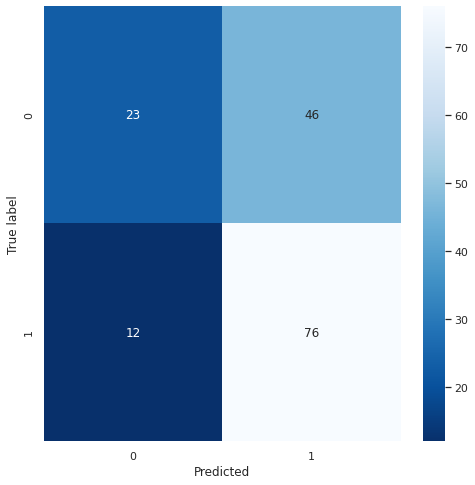

In [71]:
#Построение Confusion matrix
cm = confusion_matrix(y_test_cl, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Мы имеем показатель accuracy = 0.63, recall = 0.86 и precision = 0.62. Метрика recall у нас достаточно высока, что говорит о том что модель делает достаточно мало ошибок второго рода. Учитывая цель задачи, а именно, чтобы молоко было вкусным, для нас важнее всего масимально исключить ошибки первого рода, т.е. максимизировать precision.

In [72]:
#Датафрем с реальными значениями и значениями, которая выдала модель
y_proba = clf.predict_proba(X_test_cl)[:,1]

data = pd.DataFrame(zip(y_test_cl, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data

,y_valid,y_proba
85,1.0,0.855926
51,1.0,0.842432
66,1.0,0.839103
110,1.0,0.835965
147,1.0,0.812657
...,...,...
47,0.0,0.327418
144,0.0,0.320264
141,0.0,0.311333
46,0.0,0.306976


In [73]:
#Тестирование разных порогов
thresholds = [round(i,2) for i in np.linspace(0.65,0.85,num = 20,endpoint=False)]

columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
data.sample(5)

,y_valid,y_proba,y_pred_0.65,y_pred_0.66,y_pred_0.67,y_pred_0.68,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72,...,y_pred_0.75,y_pred_0.76,y_pred_0.77,y_pred_0.78,y_pred_0.79,y_pred_0.8,y_pred_0.81,y_pred_0.82,y_pred_0.83,y_pred_0.84
20,1.0,0.607165,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0.0,0.584407,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1.0,0.618530,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,1.0,0.605890,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0.0,0.451382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Подсчет precision для каждого порога
precisions = pd.DataFrame(columns=['Порог', 'Precision'])

rw = 0
for col in data.columns[2:]:
    precisions.loc[rw] = [col, precision_score(data['y_valid'], data[col])]
    rw = rw + 1
precisions

,Порог,Precision
0,y_pred_0.65,0.761905
1,y_pred_0.66,0.758065
2,y_pred_0.67,0.785714
3,y_pred_0.68,0.773585
4,y_pred_0.69,0.816327
5,y_pred_0.7,0.840909
6,y_pred_0.71,0.820513
7,y_pred_0.72,0.837838
8,y_pred_0.73,0.833333
9,y_pred_0.74,0.888889


Выбираем порог 0.8, порог выше брать опасно, потому что модель начнет отметать вообще все варианты.

### Прогноз модели

In [75]:
#Создание датафрейма для использования на нем модели
cow_buy_ml_2 = cow_buy.copy()

cow_buy_ml_2['эке'] = ferma_main['эке'].mean()*1.05
cow_buy_ml_2['спо'] = ferma_main['спо'].mean()*1.05
cow_buy_ml_2['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean()*1.05

cow_buy_ml_2.loc[cow_buy_ml_2['спо']<0.92, ['спо']] = 0
cow_buy_ml_2.loc[cow_buy_ml_2['спо']>=0.92, ['спо']] = 1

cow_buy_ml_2.rename(columns={'текущая_жирность_%': 'жирность_%', 'текущий_уровень_белок_%': 'белок_%'}, inplace=True)

cow_buy_ml_2

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке,спо,сырой_протеин_г
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,15.276162,1.0,2019.947532
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет,15.276162,1.0,2019.947532
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,15.276162,1.0,2019.947532
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет,15.276162,1.0,2019.947532
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет,15.276162,1.0,2019.947532
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее2лет,15.276162,1.0,2019.947532
6,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,15.276162,1.0,2019.947532
7,висбикайдиал,равнинное,соверин,буйный,3.57,3.079,более2лет,15.276162,1.0,2019.947532
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,15.276162,1.0,2019.947532
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее2лет,15.276162,1.0,2019.947532


In [76]:
#Масштабирование колличественных признаков
quantitive_names = ['эке', 'сырой_протеин_г', 'жирность_%', 'белок_%']

cow_buy_ml_2_scaled = scaler_cl.transform(cow_buy_ml_2[quantitive_names])

#Использование OneHotEncoder для категориальных признаков (кодирование признаков)
categorical_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы']

cow_buy_ml_2_ohe = encoder_cl.transform(cow_buy_ml_2[categorical_names])

encoder_col_names = encoder_cl.get_feature_names()
encoder_col_names

array(['x0_рефлешнсоверинг', 'x1_холмистое', 'x2_соверин', 'x3_менее2лет',
       'x4_1.0', 'x5_буйный', 'x5_геркулес', 'x5_соловчик'], dtype=object)

In [77]:
#Соединение в один датафрейм
X_cow_buy_ml_2_ohe = pd.DataFrame(cow_buy_ml_2_ohe, columns=encoder_col_names)

X_cow_buy_ml_2_scaled = pd.DataFrame(cow_buy_ml_2_scaled, columns=quantitive_names)

X_cow_buy_ml_2 = pd.concat([X_cow_buy_ml_2_ohe, X_cow_buy_ml_2_scaled], axis=1)
X_cow_buy_ml_2

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее2лет,x4_1.0,x5_буйный,x5_геркулес,x5_соловчик,эке,сырой_протеин_г,жирность_%,белок_%
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.56625,0.517384,-0.158918,0.094429
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.56625,0.517384,-0.399401,2.028176
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.56625,0.517384,-0.098797,-0.679069
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.56625,0.517384,-1.241093,-5.706810
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.56625,0.517384,0.201807,-0.679069
5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.56625,0.517384,0.141686,-8.800805
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.56625,0.517384,-0.158918,0.094429
7,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.56625,0.517384,-0.219039,1.254677
8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.56625,0.517384,-0.098797,-0.679069
9,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.56625,0.517384,-1.241093,1.254677


In [78]:
#Получение предсказаний
taste_predictions = clf.predict_proba(X_cow_buy_ml_2)[:,1] > 0.8
taste_predictions  = ['вкусное' if x==True else 'невкусное' for x in taste_predictions]
taste_predictions

['невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное']

Т к ни одной коровы с вкусным молоком не найдено, чуть-чуть понизим порог.

In [79]:
#Получение предсказаний в числовом виде
taste_predictions = clf.predict_proba(X_cow_buy_ml_2)[:,1]
taste_predictions.sort()
taste_predictions

array([0.10499513, 0.1057183 , 0.1075155 , 0.16853417, 0.3665769 ,
       0.42348323, 0.46434036, 0.52197   , 0.55741058, 0.55741058,
       0.57593147, 0.57593147, 0.57593147, 0.66164506, 0.66355096,
       0.66634426, 0.69598333, 0.71114079, 0.71114079, 0.74530906])

Мы видим, что при пороге в 0.7 будет целых три коровы с наиболее вероятным вкусным молоком, поэтому установим именно такой порог.

In [80]:
#Получение предсказаний
taste_predictions = clf.predict_proba(X_cow_buy_ml_2)[:,1] > 0.7
taste_predictions  = ['вкусное' if x==True else 'невкусное' for x in taste_predictions]
taste_predictions

['вкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'вкусное',
 'невкусное',
 'невкусное',
 'вкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное',
 'невкусное']

In [81]:
#Добавление предсказаний в итоговую таблицу
cow_buy_pred['вкус_молока'] = taste_predictions
cow_buy_pred

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,удой_кг,вкус_молока
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6000.523571,вкусное
1,висбикайдиал,равнинное,соверин,буйный,3.54,3.081,менее2лет,5769.315303,невкусное
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,5674.604050,невкусное
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более2лет,5983.693651,невкусное
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более2лет,5932.750341,невкусное
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее2лет,5815.984492,невкусное
6,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6000.523571,вкусное
7,висбикайдиал,равнинное,соверин,буйный,3.57,3.079,более2лет,5961.864012,невкусное
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более2лет,5674.604050,невкусное
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее2лет,5791.144942,вкусное


### **Вывод**

Модель была обучена на данных из ferma_main, был добавлен столбец имя_папы из ferma_dad, СПО кластеризировано и переведено в категориальные данные

В итоге получили соледующие данные для модели:

Колличественные: эке, сырой_протеин_г, жирность_%, белок_%.

Категориальные: порода, тип_пастбища, порода_папы_быка, спо, возраст, имя_папы.

Был проведен анализ модели, она показала: accuracy: 0.631, recall: 0.623, precision: 0.864. Для решения задачи нам важна метрика precision, пэтоиу далее мы ее повысили за счет повышения порога срабатывания, получили порог равный 0.8.

Далее использовали модель на cow_buy и получили пресказания вкуса молока, которые добавили в cow_buy_pred.

## Итоговые выводы
<a id='section_7'></a>

In [82]:
#Поиск коров удовлетворяющим условиям поставленной задачи
cow_buy_pred[(cow_buy_pred['удой_кг'] >= 6000)&(cow_buy_pred['вкус_молока'] == 'вкусное')]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,удой_кг,вкус_молока
0,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6000.523571,вкусное
6,висбикайдиал,холмистое,айдиал,геркулес,3.58,3.076,более2лет,6000.523571,вкусное


### 1 Загрузка данных

1. Загрузили данные из 3x датафреймов
2. Привели название столбцов к snake_case

Типы дынных:
1. ferma_main (634 записи)
    - Категориальные: порода, тип_пастбища, порода_папы_быка, вкус_молока, возраст.
    - Колличественные: id, удой_кг, эке, сырой_протеин_г, спо, жирность_%, белок_%.
2. ferma_dad (629 записей)
    - Категориальные: имя_папы.
    - Колличественные: id.
3. cow_buy (20 записей)
    - Категориальные: порода, тип_пастбища, порода_папы_быка, имя_папы, возраст. 
    - Колличественные: текущая_жирность_%, текущий_уровень_белок_%.

Пропуски отсутствуют.

### 2 Предобработка данных

При предобработке данных было сделано следующее:

1. Были изменены типы данных:
    - ferma_main: 'эке', 'спо', 'жирность_%', 'белок_%' ---> float
    - cow_buy: 'текущая_жирность_%', 'текущий_уровень_белок_%' ---> float
2. Были исправллены неявные дубликаты в столбцах тип_пастбища и порода_папы_быка датафрейма ferma_main.
3. Категориальные значения были приведены к единому виду во всех датафреймах
4. Было удалено 5 дубликатов в ferma_main (в ferma_main осталось 629 записей)


### 3 Исследовательский анализ данных

**ferma_main:**

**Колличественные признаки**

1. удой_кг: медиана и среднее значение примерно равны 6100, данные распределены правдоподобно.
2. эке: медиана и среднее значение примерно равны 14.5, данные распределены правдаподобно.
3. сырой_протеин_г: медиана и среднее значение примерно равны 0.92, данные распределены правдаподобно.
4. спо: медиана и среднее значение примерно равны 14.5, данные распределены правдаподобно.
5. жирность_%: медиана и среднее значение примерно равны 3.6, данные распределены правдаподобно.
6. белок_%: медиана и среднее значение примерно равны 3.07, данные распределены правдаподобно.

**Категориальные признаки**

1. порода: Вис Бик Айдиал больше, чем Рефлешн Соверинг.
2. тип_пастбища больше Холмистое, чем Равнинное.
3. порода_папы_быка: Айдиал и Соверинг примерно одинаковое кол-во.
4. вкус_молока: вкусно больше, чем невкусно.
5. возраст: более 2 лет гораздо больше, чем менее 2 лет.


**ferma_dad:**

имя_папы: всего 4 уникальных значения, преобладают Берин и Буйный.

**cow_buy:**

**Колличественные признаки**

1. текущая_жирность_%: медиана и среднее значение примерно равны 3.6, данные распределены правдаподобно.
2. текущий_белок_%: медиана и среднее значение примерно равны 3.07, данные распределены правдаподобно.

**Категориальные признаки**

1. порода: Вис Бик Айдиал больше, чем Рефлешн Соверинг.
2. тип_пастбища больше Холмистое, чем Равнинное.
3. порода_папы_быка: Айдиал и Соверинг примерно одинаковое кол-во.
4. имя_папы: больше всего Буйный, потом идет Геркулес, Барин и Соловчик.
5. возраст: более2лет больше, чем менее2лет.

### 4 Корреляционный анализ ferma_main

**Колличественные признаки:**

1. Мультиколлинеарность отсутсвует, самая большая корреляция между ЭКЕ и СПО и составляет 0.75.

2. Белок никак не коррелирует с целевым признаком, поэтому не будем его учитывать в модели.

3. Все остальные колличественные признаки коррелируют с целевым признаком и при этом не так сильно коррелируют друг с другом, избекая мультиколлинеарности.

**Категориальные признаки:**

1. Вкус молока не коррелирует с целевым признаком.

2. Категориальные признаки почти не коррелируют с колличественными, нет мультиколлинернаости.

**Типы связи между целевым признаком (удой_кг) и входными признакакми:**

1. ЭКЕ: Зависимоть похожа на линейную, однако она немного изогнута, что может говорить о другом характере зависимости.

2. Протеин: Зависимость слабо похожа на линейную из-за слишком высокого разброса точек.

3. СПО: Точки разделены на 2 категории: 
    - 1 категория: 0.84 - 0.92 с низким удоем.
    - 2 категория: 0.92 - 0.96 с высоким удоем.
    
    
4. Жирность: точки формируют 2 больших скопления на 3.6 % и 3.7 % соответственно, все остальные точки разбросаны между 3 и 3.5. Линейной зависимости не наблюдается.

5. Белок: точки разбросаны по всему графику более менее равномерно, накакой зависисти не наблюдается.

**Данные для модели:**

Колличественные: ЭКЕ, протеин, СПО, жирность.

Категориальные: порода, тип пастбища, порода папы быка, возраст.

Дополнительные признаки вводить не надо.

### 5 Задача регрессии

Было сделано три модели: 

Данные для модели:

Колличественные: эке, сырой_протеин_г, спо, жирность_%.

Категориальные: порода, тип_пастбища, порода_папы_быка, возраст.

1. С точностью 0.784. Категориальные данные были обработаны OneHotEncoder, колличестветвенные стандартизированы с помощью StandartScaler.

2. С точностью 0.818. для повышения точности дополнительно было сделано следующее: 
    - СПО было кластеризировано.
    - ЭКЕ возведено в квадрат для устранения нелинейности.
    
3. С точностью 0.824. для повышения точности дополнительно было сделано следующее: 
    - добавлен столбцец имя_папы из ferma_dad.
    
В итоге мы использовали третью модель и получили прогнозы удоя, которые сохранили в cow_buy_pred.

### 6 Задача классификации

Модель была обучена на данных из ferma_main, был добавлен столбец имя_папы из ferma_dad, СПО кластеризировано и переведено в категориальные данные

В итоге получили соледующие данные для модели:

Колличественные: эке, сырой_протеин_г, жирность_%, белок_%.

Категориальные: порода, тип_пастбища, порода_папы_быка, спо, возраст, имя_папы.

Был проведен анализ модели, она показала: accuracy: 0.631, recall: 0.864, precision: 0.623. Для решения задачи нам важна метрика precision, пэтоиу далее мы ее повысили за счет повышения порога срабатывания, получили порог равный 0.8.

Далее использовали модель на cow_buy и получили пресказания вкуса молока, которые добавили в cow_buy_pred.

### 7 Итог

После использования моделей получили предсказания по каждой корове, получили 2ух коров удовлетворяющих сразу 2ум поставленным требованиям (удой > 6000) и (вкусное молоко), поэтому именно к эти коровам стоит присмотреться при покупке.